In [2]:
import os,shutil
from keras import layers, models, optimizers
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [6]:
original_dataset_dir = '/Users/aadityasrivathsan/Downloads/dogsCats'
base_dir = '/Users/aadityasrivathsan/Downloads/dogsCatsSmallFinal'

os.mkdir(base_dir)

train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)

test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
    

In [7]:
# create network
network = models.Sequential()
network.add(layers.Conv2D(32,(3,3),activation = 'relu',input_shape = (150,150,3)))
network.add(layers.MaxPooling2D((2,2)))
network.add(layers.Conv2D(64,(3,3),activation = 'relu'))
network.add(layers.MaxPooling2D((2,2)))
network.add(layers.Conv2D(128,(3,3),activation = 'relu'))
network.add(layers.MaxPooling2D((2,2)))
network.add(layers.Conv2D(256,(3,3),activation = 'relu'))
network.add(layers.MaxPooling2D((2,2)))
network.add(layers.Flatten())
network.add(layers.Dense(512,activation='relu'))
network.add(layers.Dense(1,activation = 'sigmoid'))

# compile network
network.compile(loss ='binary_crossentropy',optimizer = optimizers.RMSprop(lr = 1e-4),metrics = ['accuracy'])

In [8]:
trainDataGen = ImageDataGenerator(rescale = 1./255)
testDataGen = ImageDataGenerator(rescale = 1./255)

trainGenerator = trainDataGen.flow_from_directory(train_dir, target_size = (150,150),batch_size=20,class_mode = 'binary')
validationGenerator = testDataGen.flow_from_directory(train_dir, target_size = (150,150),batch_size=20,class_mode = 'binary')

Found 2000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [10]:
history = network.fit_generator(trainGenerator,steps_per_epoch=100,epochs=10,validation_data=validationGenerator,validation_steps = 50)

Epoch 1/10
100/100 [==============================] - 80s 798ms/step - loss: 0.2489 - acc: 0.8965 - val_loss: 0.2005 - val_acc: 0.9310
Epoch 2/10
100/100 [==============================] - 78s 784ms/step - loss: 0.2275 - acc: 0.9150 - val_loss: 0.1505 - val_acc: 0.9590
Epoch 3/10
100/100 [==============================] - 410s 4s/step - loss: 0.2006 - acc: 0.9260 - val_loss: 0.1511 - val_acc: 0.9510
Epoch 4/10
100/100 [==============================] - 79s 787ms/step - loss: 0.1830 - acc: 0.9305 - val_loss: 0.1267 - val_acc: 0.9690
Epoch 5/10
100/100 [==============================] - 78s 784ms/step - loss: 0.1502 - acc: 0.9465 - val_loss: 0.1053 - val_acc: 0.9720
Epoch 6/10
100/100 [==============================] - 79s 786ms/step - loss: 0.1241 - acc: 0.9575 - val_loss: 0.0648 - val_acc: 0.9870
Epoch 7/10
100/100 [==============================] - 78s 780ms/step - loss: 0.1260 - acc: 0.9585 - val_loss: 0.0711 - val_acc: 0.9810
Epoch 8/10
100/100 [==============================] - 78s

In [12]:
 network.save('catsAndDogs1.h5')

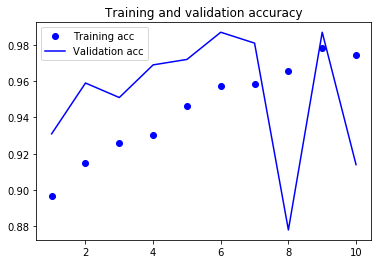

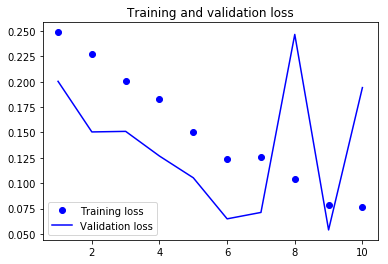

In [14]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [16]:
datagen = ImageDataGenerator(
            rotation_range = 40,
            width_shift_range = 0.2,
            height_shift_range = 0.2,
            shear_range = 0.2,
            zoom_range = 0.2,
            horizontal_flip = True,
            fill_mode = 'nearest')

In [17]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])


In [18]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(

train_dir,
target_size=(150, 150),
batch_size=32,
class_mode='binary')
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50)


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 122s 1s/step - loss: 0.6925 - acc: 0.5175 - val_loss: 0.6871 - val_acc: 0.5298
Epoch 2/100
100/100 [==============================] - 121s 1s/step - loss: 0.6808 - acc: 0.5606 - val_loss: 0.6827 - val_acc: 0.5238
Epoch 3/100
100/100 [==============================] - 121s 1s/step - loss: 0.6699 - acc: 0.5850 - val_loss: 0.6646 - val_acc: 0.5850
Epoch 4/100
100/100 [==============================] - 118s 1s/step - loss: 0.6645 - acc: 0.5847 - val_loss: 0.6554 - val_acc: 0.6012
Epoch 5/100
100/100 [==============================] - 119s 1s/step - loss: 0.6416 - acc: 0.6150 - val_loss: 0.6207 - val_acc: 0.6440
Epoch 6/100
100/100 [==============================] - 120s 1s/step - loss: 0.6342 - acc: 0.6303 - val_loss: 0.6184 - val_acc: 0.6308
Epoch 7/100
100/100 [==============================] - 118s 1s/step - loss: 0.6089 - acc: 0.6641 - val_loss: 0.6

KeyboardInterrupt: 

In [21]:
network.predict_generator(validationGenerator)

ValueError: `steps=None` is only valid for a generator based on the `keras.utils.Sequence` class. Please specify `steps` or use the `keras.utils.Sequence` class.